In [168]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [169]:
customer_df = pd.read_csv('Cust_Segmentation.csv')
customer_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [170]:
customer_df.set_index('Customer Id' , inplace=True)
customer_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [171]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   Address          850 non-null    object 
 8   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4), object(1)
memory usage: 66.4+ KB


**Preprocessing**

In [172]:
customer_df.drop(['Defaulted','Address'] , axis=1 ,inplace=True)

In [173]:
customer_df['Age'].min()

20

In [174]:
customer_df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Customer Id,,,,,,,
1,41,2,6,19,0.124,1.073,6.3
2,47,1,26,100,4.582,8.218,12.8
3,33,2,10,57,6.111,5.802,20.9
4,29,2,4,19,0.681,0.516,6.3
5,47,1,31,253,9.308,8.908,7.2


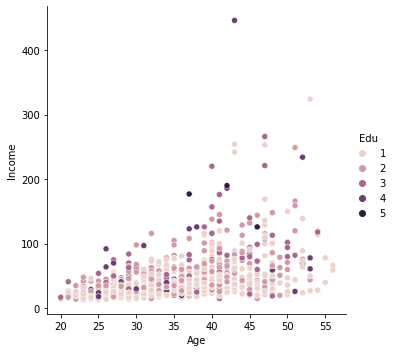

In [175]:
sns.relplot(data=customer_df , x='Age' , y = 'Income' , hue='Edu')

In [176]:
customer_df2 = customer_df[customer_df['Income'] < 300]

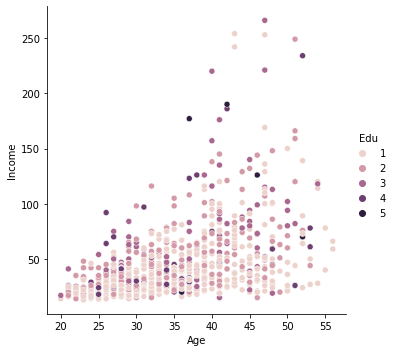

In [177]:
sns.relplot(data=customer_df2 , x='Age' , y = 'Income' , hue='Edu')

In [178]:
customer_df2.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Customer Id,,,,,,,
1,41,2,6,19,0.124,1.073,6.3
2,47,1,26,100,4.582,8.218,12.8
3,33,2,10,57,6.111,5.802,20.9
4,29,2,4,19,0.681,0.516,6.3
5,47,1,31,253,9.308,8.908,7.2


**Normalizing**

In [179]:
from sklearn.preprocessing import StandardScaler
customer_df_values = customer_df2.values[:,1:]
customer_df_values = np.nan_to_num(customer_df_values)
customer_df3 = StandardScaler().fit_transform(customer_df_values)

In [180]:
customer_df3

array([[ 0.31500208, -0.37578089, -0.77332674, -0.69395363, -0.58975474,
        -0.57722438],
       [-0.76646256,  2.59958975,  1.55723956,  1.47046814,  1.53915241,
         0.38984577],
       [ 0.31500208,  0.21929324,  0.32002535,  2.21281917,  0.81928681,
         1.59496395],
       ...,
       [ 2.47793136, -1.26839209, -0.80209916,  0.60625307,  0.04698068,
         3.45471424],
       [-0.76646256,  0.5168303 , -0.51437493, -0.69783775, -0.70208477,
        -1.08307646],
       [-0.76646256,  1.11190443,  0.52143232,  0.15181189,  0.17450654,
        -0.23503033]])

**find best k number for clustering by elbow method**

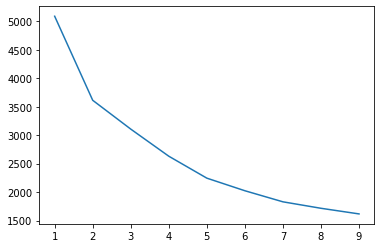

In [181]:
k_range = range(1,10)
sse = []

for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(customer_df3)
  sse.append(km.inertia_) # calculate the sum of squared error 

plt.plot(k_range , sse) # 2 is good options

In [182]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=2 , n_init=12)

In [183]:
kmeans_model.fit(customer_df3)

KMeans(n_clusters=2, n_init=12)

In [184]:
print(len(kmeans_model.labels_))
kmeans_model.labels_

848


array([0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,